In [71]:
import time

import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from matplotlib.ticker import MultipleLocator
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

tf.keras.utils.set_random_seed(5)

In [72]:
def get_data():
    digits = load_digits()

    x = digits.data
    y = digits.target

    return x, y

In [73]:
def plot_metrics(axe, history, title):
    axe.plot(
        history['loss'], linestyle='dotted', color="#003B80", label=f'loss entrenamiento {history["loss"][-1]:.2f}'
    )
    axe.plot(history['val_loss'], color="#003B80", label=f'loss validacion {history["val_loss"][-1]:.2f}')

    axe.set_xlabel('Nº de época', color='#003B80', fontsize=13)
    axe.xaxis.set_major_locator(MultipleLocator(1))

    axe.set_ylabel('Métricas', color='#003B80', fontsize=13)
    axe.yaxis.set_major_locator(MultipleLocator(0.1))
    axe.set_ylim(ymin=0, ymax=2.1)

    axe.set_title(title)
    axe.set_facecolor("#E3F7FA")
    axe.grid(visible=True, which='major', axis='both', color='white')
    axe.set_axisbelow(True)
    axe.legend()

In [74]:
def compile_fit(net, x, y, first_layer, optimizer, learning_rate):
    layers = net
    model = Sequential()

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='selu', input_dim=first_layer))
        elif idx == len(layers) - 1:
            model.add(Dense(layer, activation='softmax'))
        else:
            model.add(Dense(layer, activation='selu'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer(learning_rate))

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    mark1 = time.time()
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=400, verbose=False)
    mark2 = time.time()

    time_elapsed = mark2 - mark1

    return model, history, time_elapsed


In [75]:
X, y = get_data()

In [76]:
optimizers = [
    tf.keras.optimizers.SGD,
    tf.keras.optimizers.Adagrad,
    tf.keras.optimizers.RMSprop,
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.Adamax,
    tf.keras.optimizers.Nadam,
]

In [77]:
learning_rates = [
    0.1,
    0.01,
    0.001,
    0.0005
]

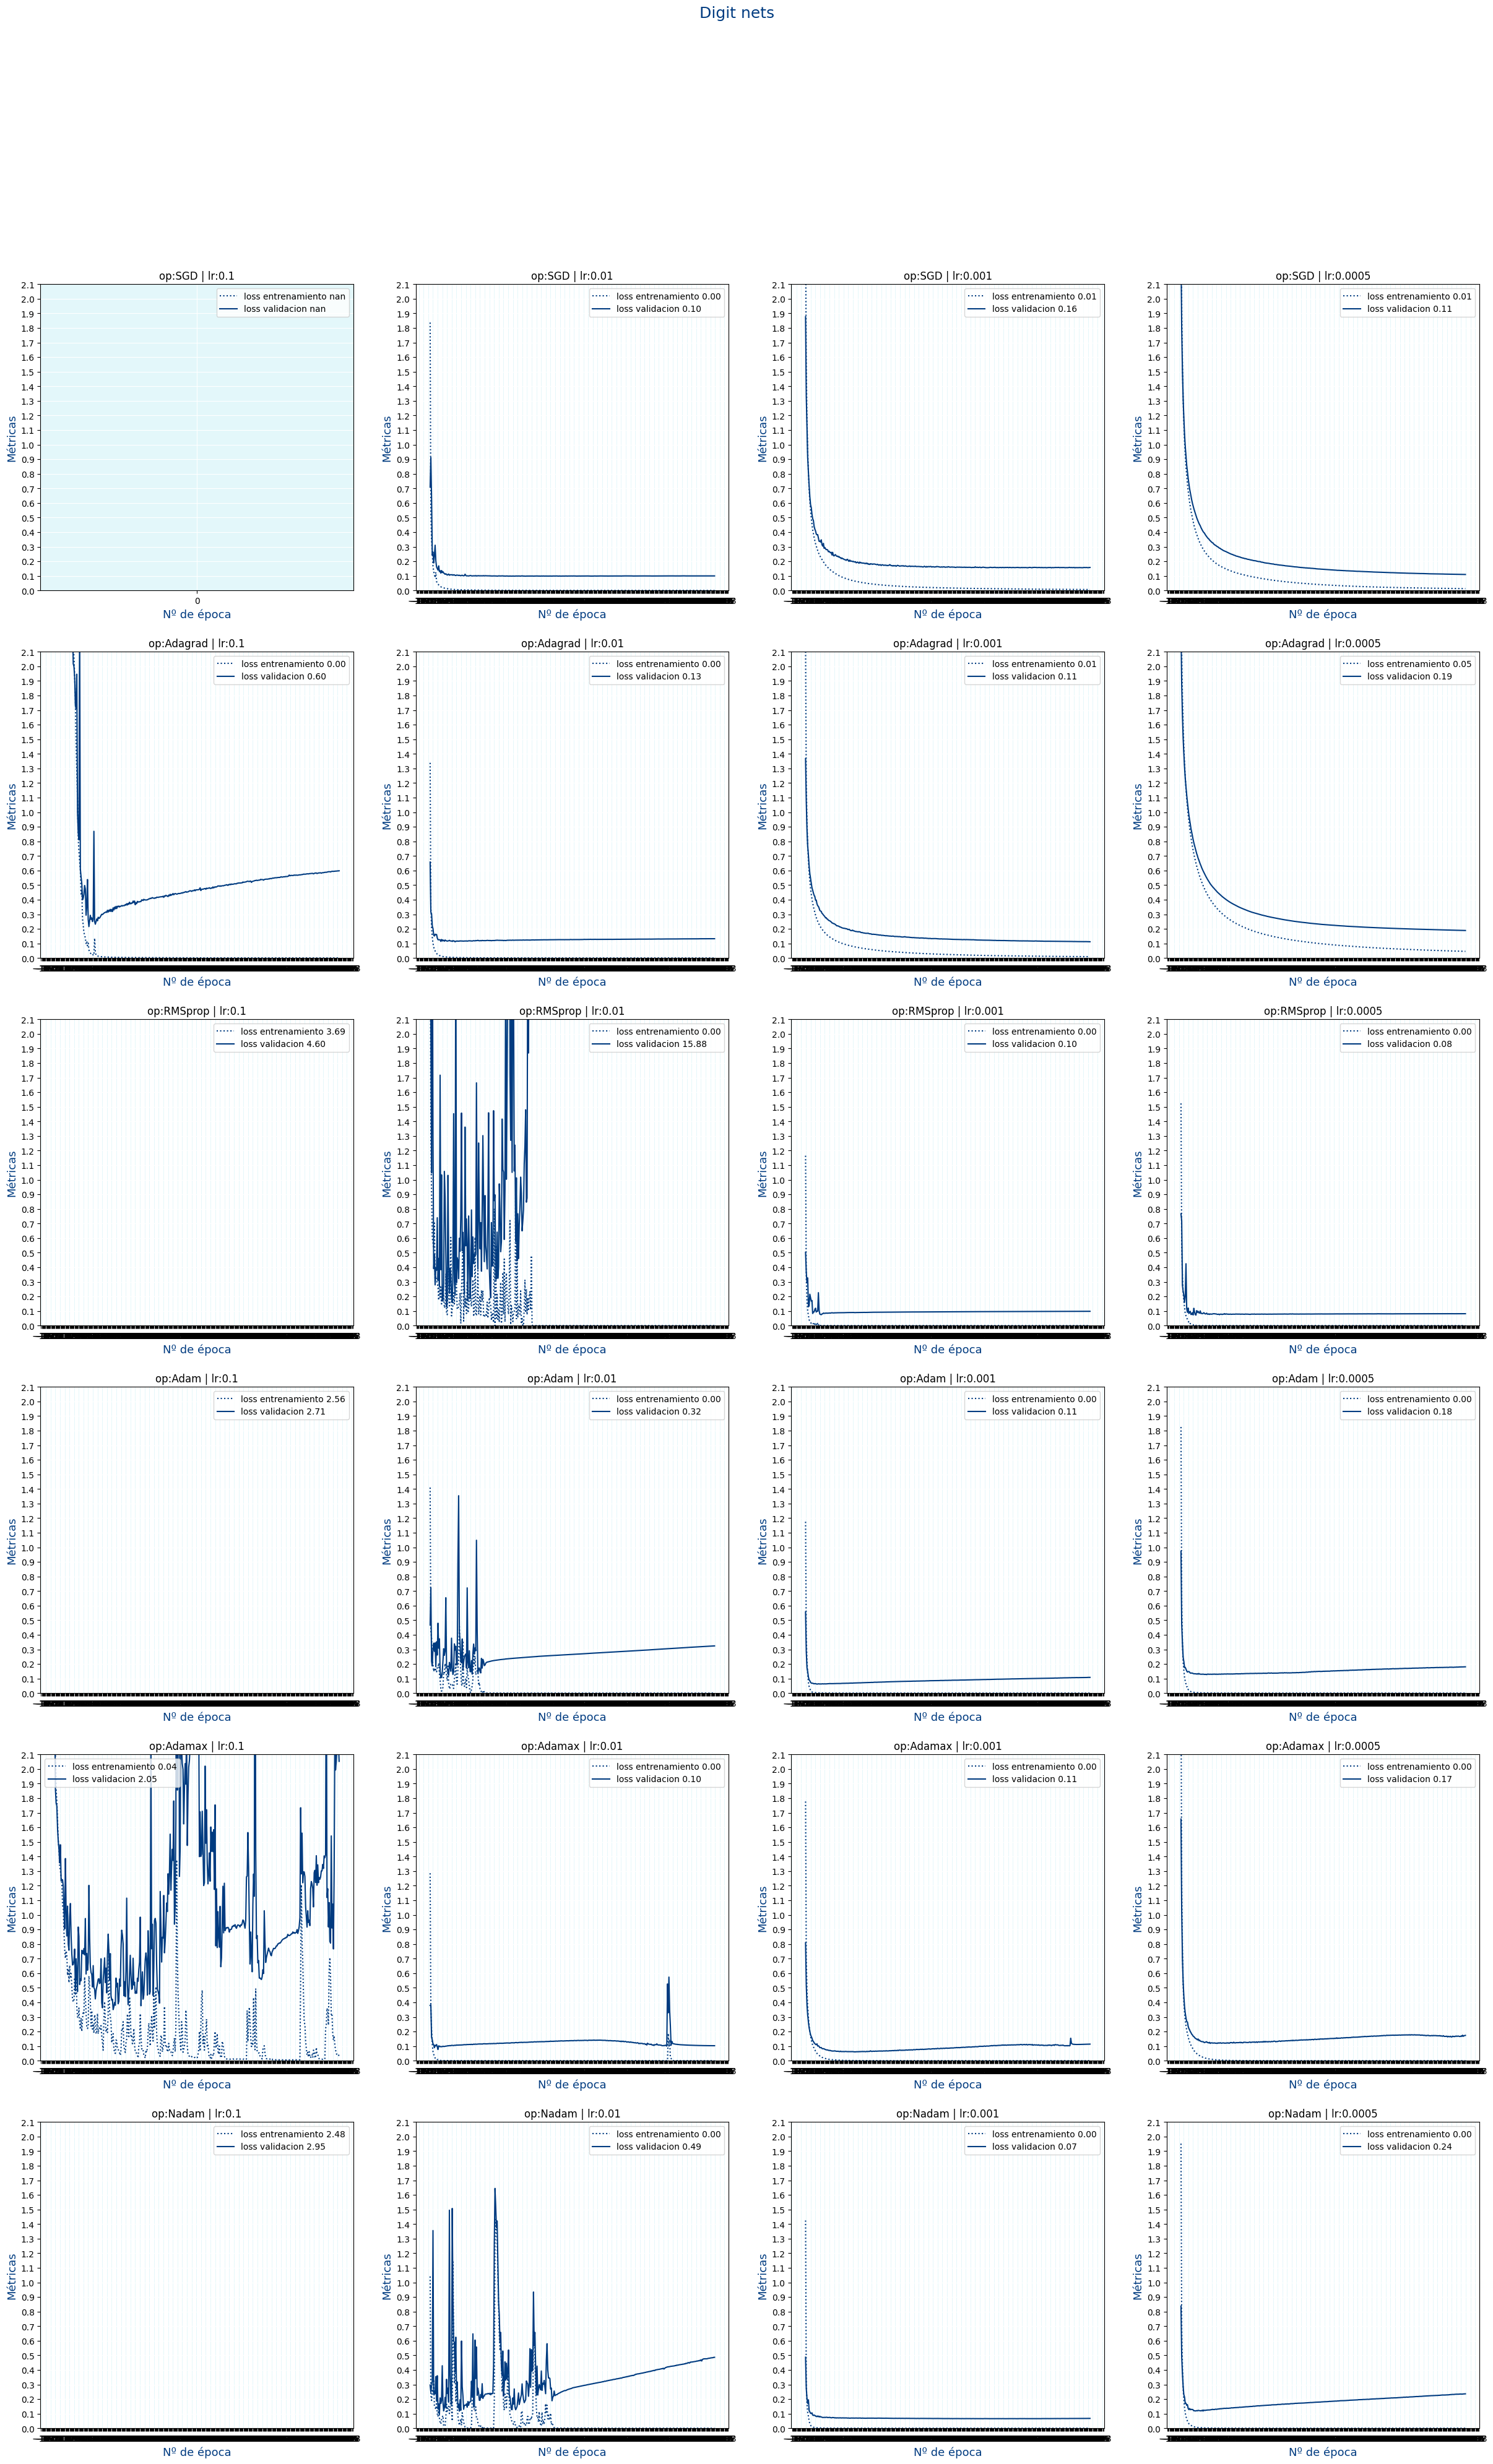

In [78]:
figure = plt.figure(figsize=(30, 45))
figure.suptitle('Digit nets', color='#003B80', fontsize=18)
figure.tight_layout()

for i, optimizer in enumerate(optimizers):
    for j, rate in enumerate(learning_rates):
        index = i * len(learning_rates) + j
        axe = figure.add_subplot(len(optimizers), len(learning_rates), index + 1)

        model, history, _ = compile_fit([64, 128, 64, 32, 16, 10], X, y, X.shape[1], optimizer, rate)

        str_net = f"op:{optimizer.__name__} | lr:{rate}"
        plot_metrics(axe, history.history, str_net)

Fav nets with 5 epochs
 1. Nadam   | lr: 001
 2. Adam    | lr: 001
 3. Adamax  | lr: 001